In [182]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("complete_dataset.csv")  # Change to the actual file path


In [184]:
df.head()  # First 5 rows



,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,01-01-2015,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,02-01-2015,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0.0,N,N
2,03-01-2015,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,04-01-2015,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,05-01-2015,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [185]:
df.isnull().sum() # Count missing values per column


date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [186]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


In [187]:
#Gives the basic overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


**Ways of filling null values**

Droping null values

Forward Fill (ffill)

Backward Fill (bfill)

Mean/Median Imputation

Interpolate - Linear, Polynomial, Spline

In [188]:
# Fill missing values using direct assignment
df.loc[:, 'solar_exposure'] = df['solar_exposure'].fillna(df['solar_exposure'].median())
df.loc[:, 'rainfall'] = df['rainfall'].fillna(df['rainfall'].median())

# Verify if missing values are handled
df.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

In [189]:
df.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

In [190]:
#Checking are there any repating values
df['RRP'].unique()

array([25.63369643, 33.13898756, 34.56485483, ..., 25.0086136 ,
       36.76470052, 75.77105901])

In [191]:
#Checking the number of times if something is repeated
df['RRP'].value_counts()

RRP
25.633696     1
96.501966     1
111.573365    1
105.451832    1
76.672204     1
             ..
65.392779     1
37.003945     1
23.790583     1
27.616491     1
75.771059     1
Name: count, Length: 2106, dtype: int64

In [192]:
df['school_day'].value_counts()

school_day
Y    1453
N     653
Name: count, dtype: int64

In [193]:
df['holiday'].value_counts()

holiday
N    2029
Y      77
Name: count, dtype: int64

## Visualizing basic features and outliers 

plotly

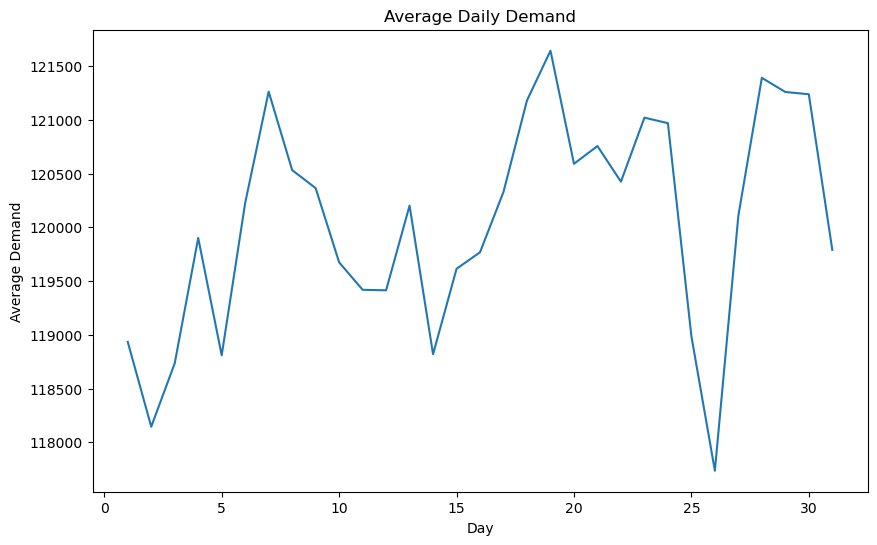

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')


# Explore daily demand variations
df['Day'] = df['date'].dt.day
daily_demand = df.groupby('Day')['demand'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_demand.index, y=daily_demand.values)
plt.title('Average Daily Demand')
plt.xlabel('Day')
plt.ylabel('Average Demand')
plt.show()


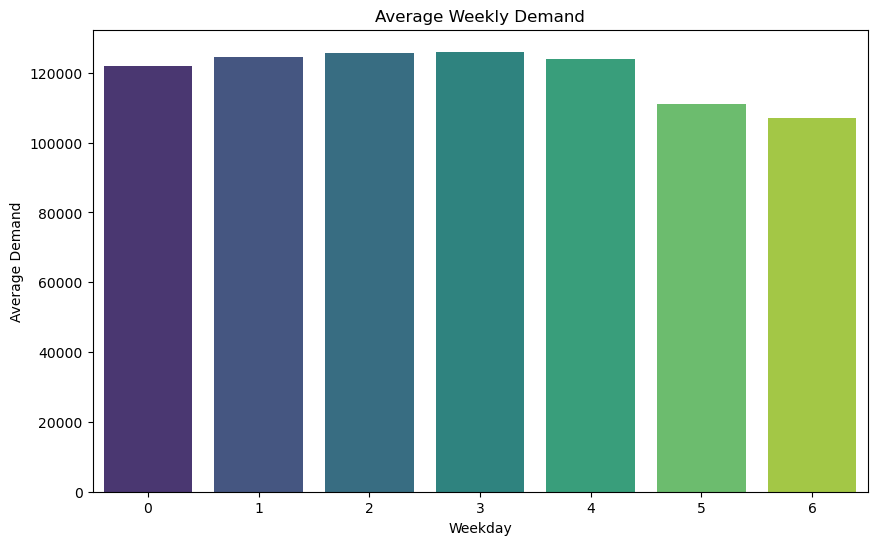

In [195]:
# Explore weekly demand variations with colors
df['Weekday'] = df['date'].dt.weekday
weekly_demand = df.groupby('Weekday')['demand'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='demand', data=weekly_demand, palette='viridis', hue='Weekday', dodge=False)
plt.title('Average Weekly Demand')
plt.xlabel('Weekday')
plt.ylabel('Average Demand')
plt.legend([],[], frameon=False)
plt.show()

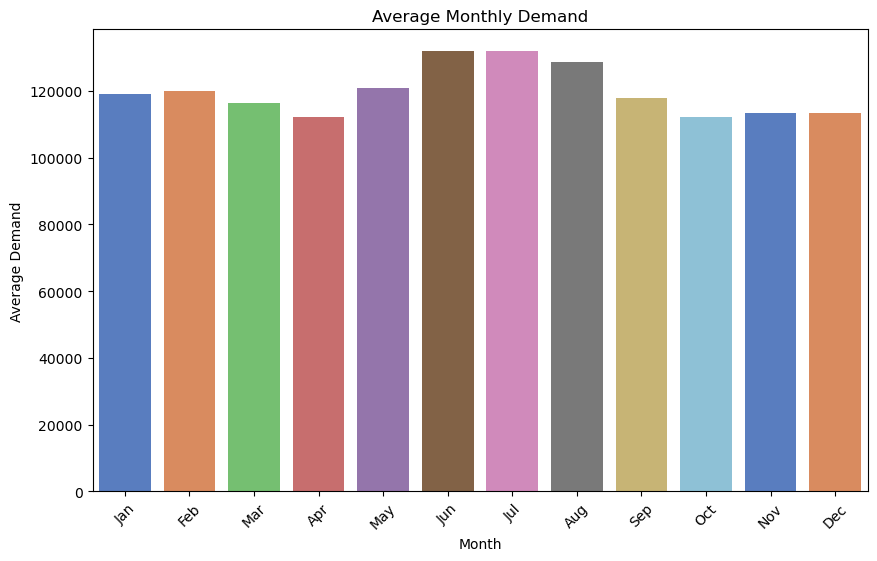

In [198]:
c

#### Analyze the relationship between demand and electricity price (RRP)

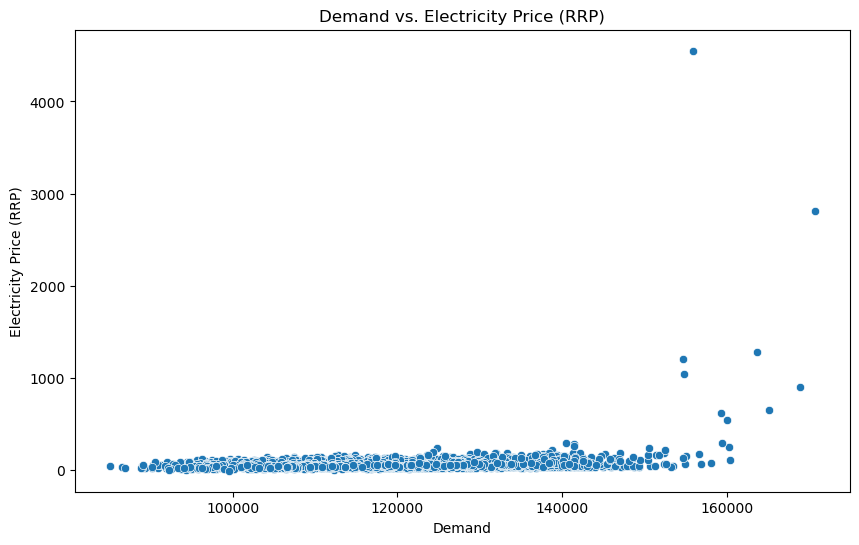

Correlation between Demand and Electricity Price (RRP): 0.21753821701323336


In [201]:
# Scatter plot: Demand vs. Electricity Price (RRP)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='demand', y='RRP', data=df)
plt.title('Demand vs. Electricity Price (RRP)')
plt.xlabel('Demand')
plt.ylabel('Electricity Price (RRP)')
plt.show()

# Correlation analysis
correlation = df['demand'].corr(df['RRP'])
print(f'Correlation between Demand and Electricity Price (RRP): {correlation}')


#### Correlate demand with temperature, solar exposure, and rainfall

min_temperature   -0.156118
max_temperature   -0.073216
solar_exposure    -0.257260
rainfall          -0.064662
Name: demand, dtype: float64


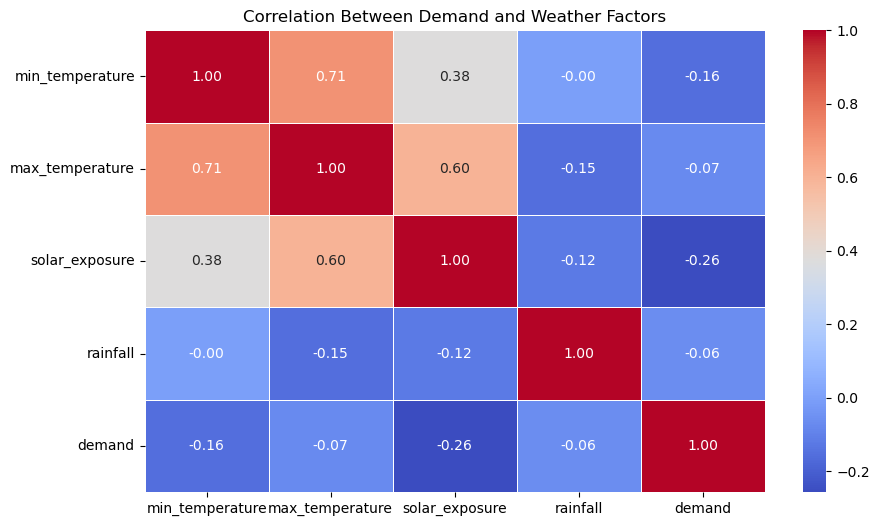

In [202]:
# Define weather-related factors
weather_factors = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Calculate correlations with demand
correlations = df[weather_factors + ['demand']].corr()['demand'].drop('demand')
print(correlations)

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[weather_factors + ['demand']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Demand and Weather Factors')
plt.show()


#### Analyze seasonal trends based on months in Australia

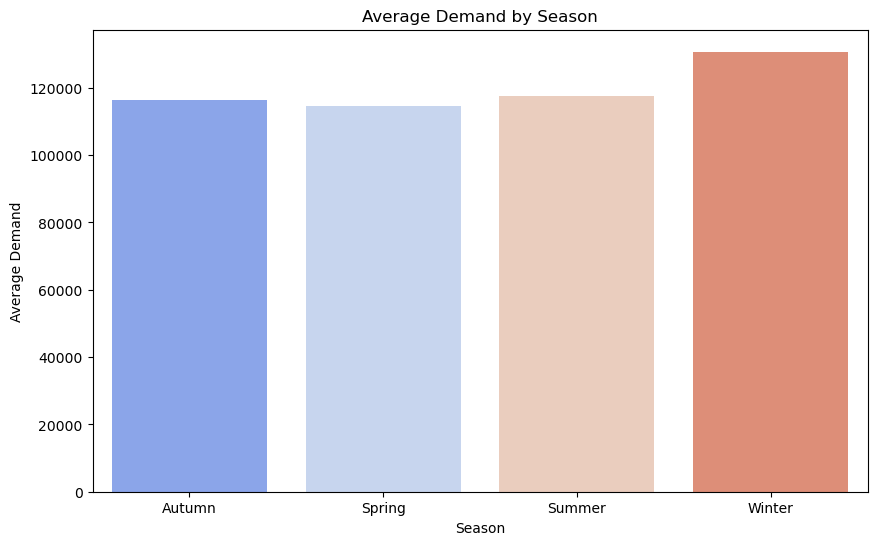

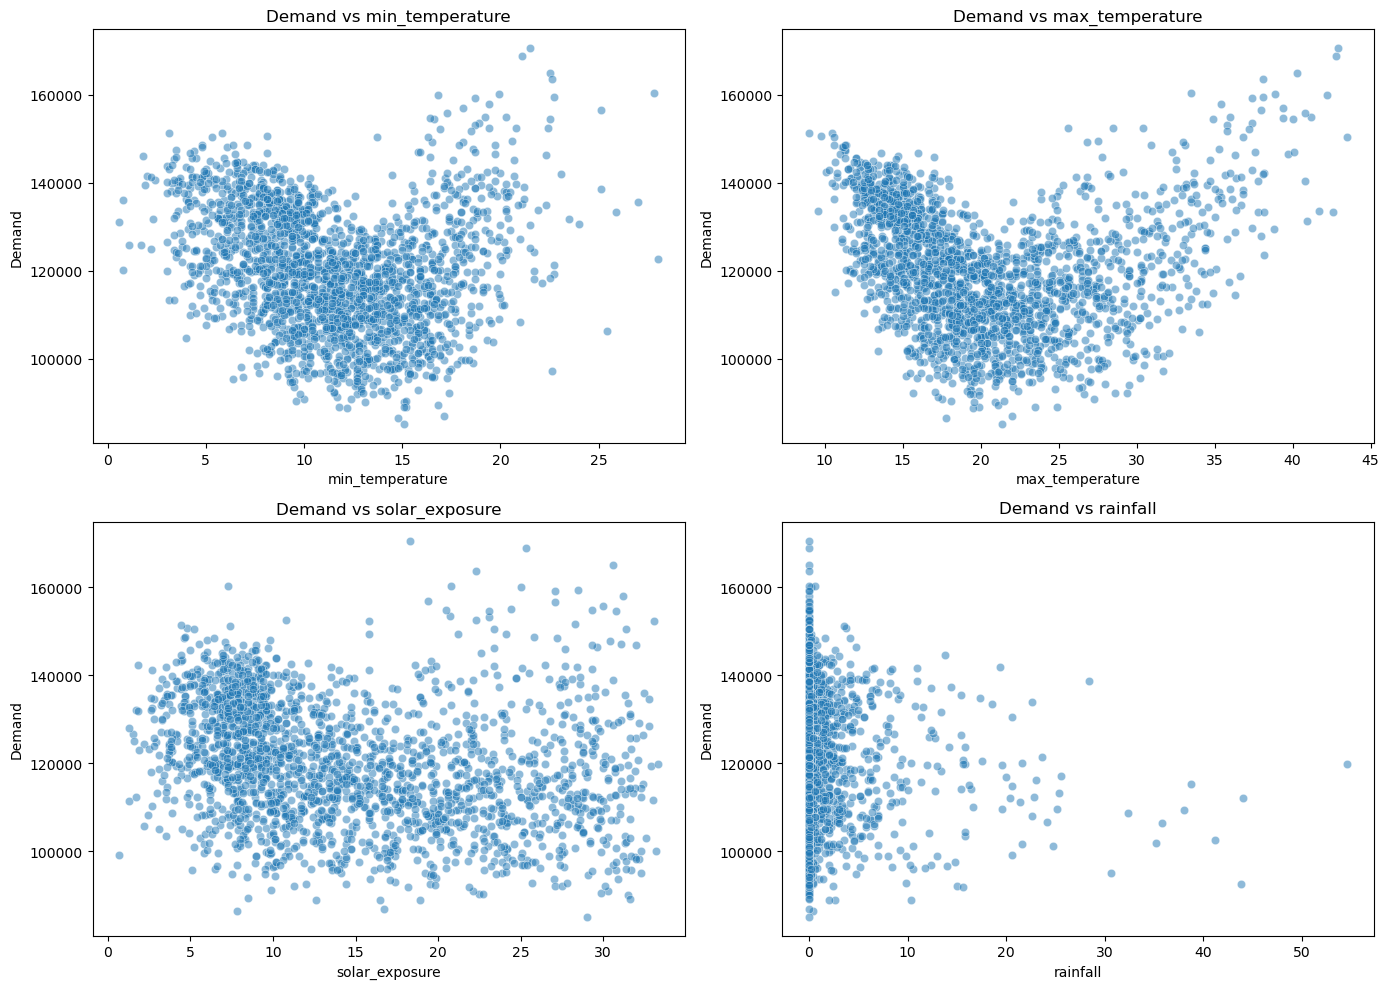

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to determine the season based on Australian months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Extract month from the date
df['Month'] = df['date'].dt.month

# Create a new column for season
df['Season'] = df['Month'].apply(get_season)

# Analyze seasonal demand trends
seasonal_demand = df.groupby('Season', as_index=False)['demand'].mean()

# Plot seasonal demand variations
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='demand', data=seasonal_demand, palette='coolwarm')
plt.title('Average Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Demand')
plt.show()

# Analyze demand under specific weather conditions
weather_factors = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

plt.figure(figsize=(14, 10))
for i, factor in enumerate(weather_factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=factor, y='demand', data=df, alpha=0.5)
    plt.title(f'Demand vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Demand')

plt.tight_layout()
plt.show()


#### Impact of Holidays and School Days on Demand

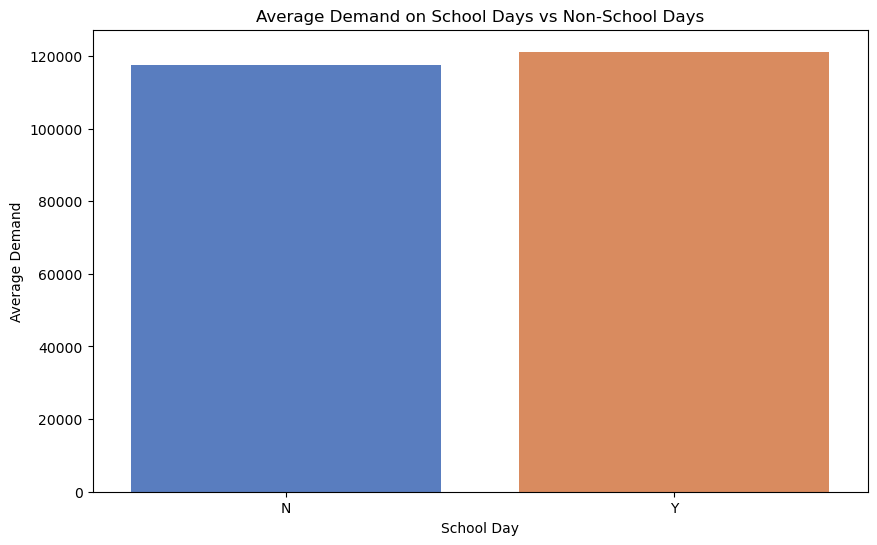

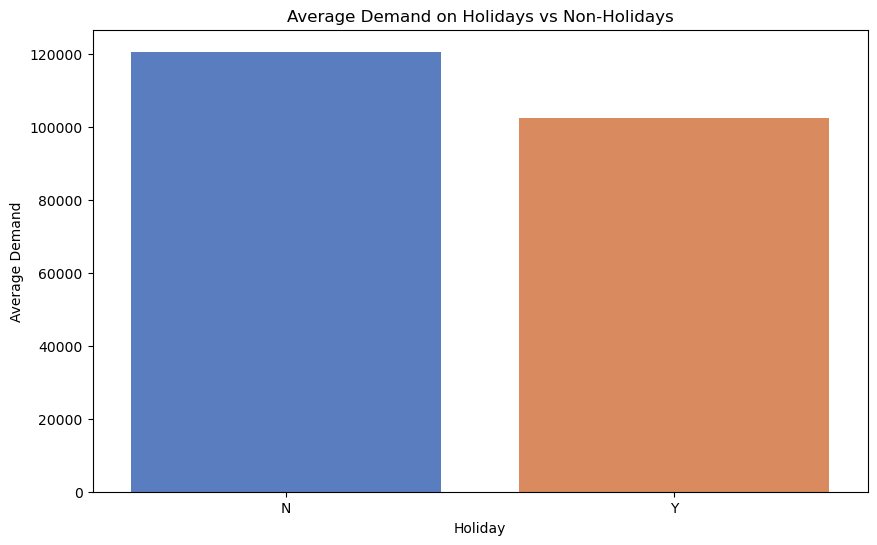

In [205]:
# Study the impact of school days on demand
school_day_demand = df.groupby('school_day', as_index=False)['demand'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='school_day', y='demand', data=school_day_demand, palette='muted')
plt.title('Average Demand on School Days vs Non-School Days')
plt.xlabel('School Day')
plt.ylabel('Average Demand')
plt.show()

# Study the impact of holidays on demand
holiday_demand = df.groupby('holiday', as_index=False)['demand'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='demand', data=holiday_demand, palette='muted')
plt.title('Average Demand on Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Demand')
plt.show()
